In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sms
import os
import inspect

In [2]:
os.listdir('.')

['.ipynb_checkpoints',
 '7U7D.csv',
 'AADIS.csv',
 'Aggregation-checkpoint.ipynb',
 'AllSharedRewardData.csv',
 'AUDIT, DUDIT, AADIS, 7U7D, rescoring and aggregation.ipynb',
 'FullSharedRewardData.csv',
 'Helping Ori & Amanda.ipynb',
 'ISTART - RECOVERED DATA - reward sensitivity screeners.csv',
 'ISTART-Reward-Quintiles-Combined.csv',
 'ISTART2021-Demographics_DATA_2021-10-29_1323.csv',
 'ISTART2021-QuestionnaireScoresU_DATA_2021-10-29_1336.csv',
 'ISTART2021-RewardSensitivityQui_DATA_2021-10-29_1337.csv',
 'ISTART2021-RSQ.csv',
 'joinedfile.csv',
 'Making_RS_PCA.ipynb',
 'Qualtrics-Data-ISTART-010522.csv',
 'ReadMe_Behavioral_Analysis.txt',
 'Reward_Sensitivity.csv',
 'Shared Reward Behavioral Analysis.ipynb',
 'Shared Reward Data Aggregation.ipynb',
 'SR_PartnerRatings.csv',
 'SR_PartnerRatings_PS.csv',
 'SR_REDCap_data.csv',
 'Substance_and_Mood_data.csv',
 'Substance_and_Mood_data_SCORED.csv',
 'ugdg_tsr_means.xlsx']

In [3]:
fname='Reward_Sensitivity.csv'
df=pd.read_csv(fname)
print(type(df))
print(type(pd.read_csv))



<class 'pandas.core.frame.DataFrame'>
<class 'function'>


,RealID,gender,SPSRWD,BISBAS_BAS,PC1
RealID,1.000000,0.042400,-0.018472,0.061359,0.034246
gender,0.042400,1.000000,0.199487,-0.026414,0.078584
SPSRWD,-0.018472,0.199487,1.000000,0.622783,0.858556
BISBAS_BAS,0.061359,-0.026414,0.622783,1.000000,0.936436
PC1,0.034246,0.078584,0.858556,0.936436,1.000000


<AxesSubplot:>

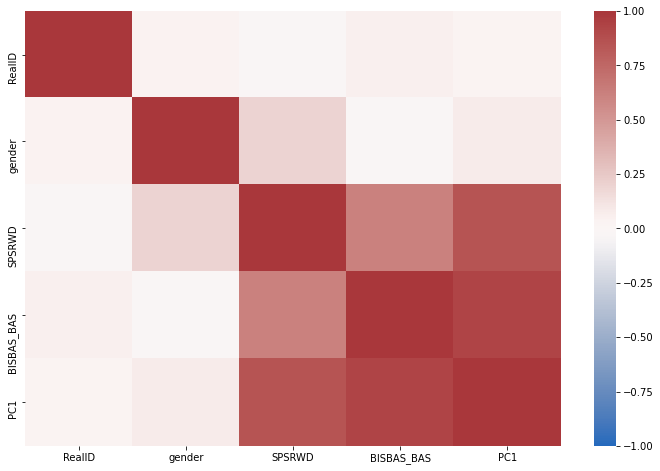

In [4]:
cormat=df.corr()
display(cormat)
fig = plt.figure(figsize=(12, 8))
sms.heatmap(cormat,cmap='vlag',vmin=-1)


Correlation between reward sensitivity is 
 R^2: 0.3878584832444186 p: 5.6013703677312385e-11


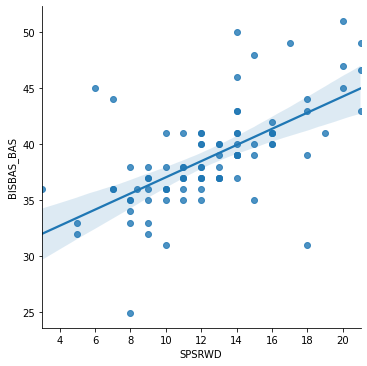

<class 'seaborn.axisgrid.FacetGrid'>


In [5]:
df=df[['RealID','gender','SPSRWD','BISBAS_BAS']]
r,p=stats.pearsonr(df['SPSRWD'],df['BISBAS_BAS'])
print("Correlation between reward sensitivity is \n R^2: %s p: %s"%(r**2,p))
g=sms.lmplot(x='SPSRWD',y='BISBAS_BAS',data=df)
plt.show()
print(type(g))


In [8]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1)

features=['SPSRWD','BISBAS_BAS']
X = df.loc[:, features].values
PC1=pca.fit_transform(X)
print(PC1)

df['PC1']=PC1
display(df['PC1'])
df.to_csv(fname,index='False')

[[  0.66446334]
 [ -1.4338822 ]
 [  0.82870138]
 [  1.08367949]
 [  1.08367949]
 [  0.17174922]
 [ -1.72560929]
 [ -1.72560929]
 [ -0.48520294]
 [ -2.71103753]
 [  0.62771436]
 [ -2.34581247]
 [  1.08367949]
 [ -9.20479638]
 [  3.89296827]
 [ -1.56137125]
 [ -5.15510125]
 [  2.48832388]
 [ -3.75045686]
 [  9.51154584]
 [  1.70388267]
 [  6.70225706]
 [ -2.34581247]
 [ 11.37378094]
 [ -0.3209649 ]
 [ 10.78870118]
 [ -4.53489807]
 [  1.86812071]
 [ -3.9146949 ]
 [  8.76385361]
 [ -4.37066003]
 [  2.65256192]
 [  1.08367949]
 [  1.24791753]
 [ -2.18157443]
 [-13.68508668]
 [  3.10852706]
 [ -1.56137125]
 [  3.56449219]
 [ -8.09187909]
 [ -5.77530442]
 [  1.24791753]
 [ -3.75045686]
 [ -7.67266294]
 [  3.89296827]
 [ -0.94116808]
 [ -3.58621882]
 [  3.89296827]
 [ -6.72398368]
 [ -3.42198078]
 [ 11.08042827]
 [ -1.10540612]
 [ -0.94116808]
 [  1.41215557]
 [  3.10852706]
 [  7.48669827]
 [ -1.10540612]
 [  8.56286658]
 [ -3.29449172]
 [ -3.13025368]
 [ -2.34581247]
 [ -1.10540612]
 [  1.41

0     0.664463
1    -1.433882
2     0.828701
3     1.083679
4     1.083679
        ...   
85   -2.510051
86    2.652562
87   -5.611066
88   -1.105406
89    0.463476
Name: PC1, Length: 90, dtype: float64

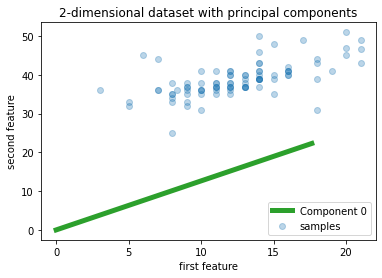

In [7]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3, label="samples")
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * var  # scale component by its variance explanation power
    plt.plot(
        [0, comp[0]],
        [0, comp[1]],
        label=f"Component {i}",
        linewidth=5,
        color=f"C{i + 2}",
    )
plt.gca().set(
    title="2-dimensional dataset with principal components",
    xlabel="first feature",
    ylabel="second feature",
)
plt.legend()
plt.show()